# ROSE

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Read the data as an appropriate Time Series data and plot the data.                            Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
%matplotlib inline

In [157]:
df_rose = pd.read_csv('C:\\Users\\amvi\\Downloads\\Rose.csv')
df_rose.head(10)

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
5,1980-06,168.0
6,1980-07,118.0
7,1980-08,129.0
8,1980-09,205.0
9,1980-10,147.0


In [158]:
df_rose.tail(10)

,YearMonth,Rose
177,1994-10,51.0
178,1994-11,63.0
179,1994-12,84.0
180,1995-01,30.0
181,1995-02,39.0
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [159]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date


DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [160]:
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_rose.head()


,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [161]:
df_rose = df_rose.set_index('Time_Stamp')
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [162]:
df_rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [163]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [164]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


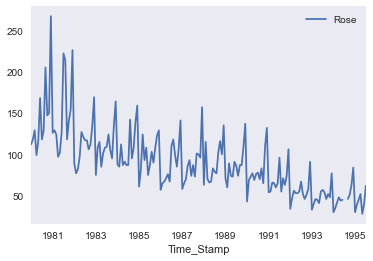

In [165]:
df_rose.plot();
plt.grid();

In [166]:
df_rose[df_rose['Rose'].isna()]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


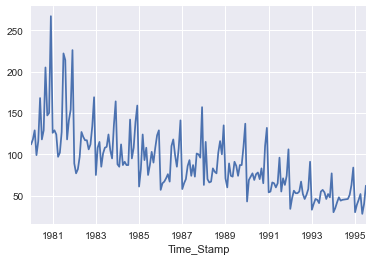

In [167]:
df_rose['Rose'].interpolate('linear').plot()

In [168]:
df_rose = df_rose.resample('M').mean().interpolate('linear')
df_rose[(df_rose.index >= '1994-07-31')&(df_rose.index <= '1994-08-31')]

,Rose
Time_Stamp,
1994-07-31,45.333333
1994-08-31,45.666667


In [169]:
df_rose.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


Text(0, 0.5, 'Units Sold')

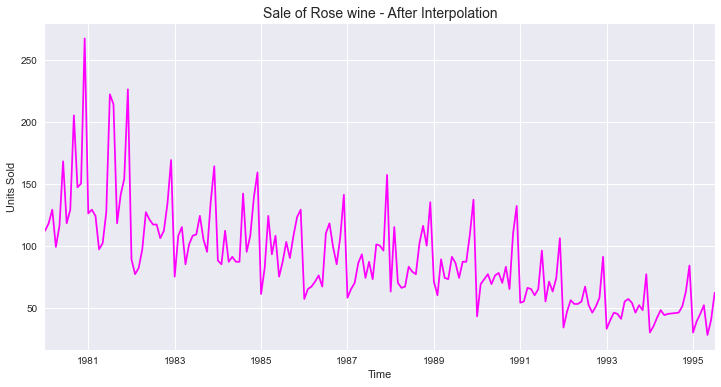

In [170]:
plt.figure(figsize = (12, 6))
df_rose.Rose.plot(color='magenta')
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

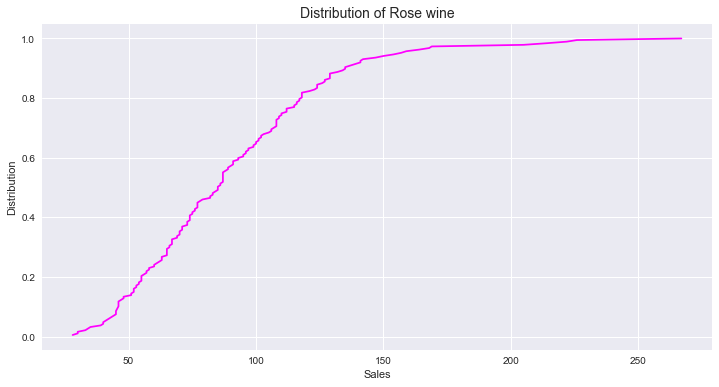

In [171]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (12, 6))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

Yearly Boxplot - Rose

Text(0.5, 1.0, 'Yearly Boxplot - Rose')

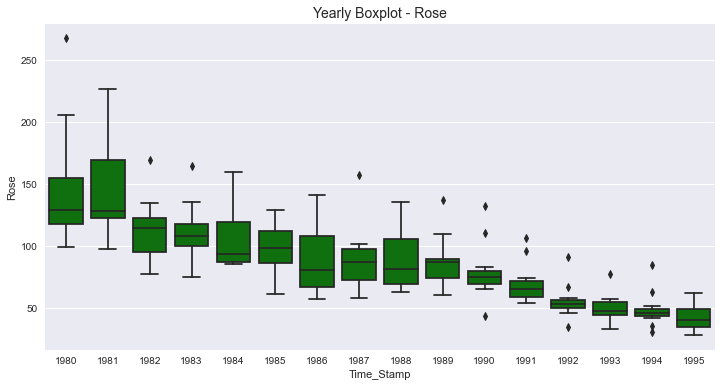

In [172]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_rose.index.year,y = df_rose['Rose'], color='green')
plt.title('Yearly Boxplot - Rose', fontsize=14)

Monthly Plot - Rose

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

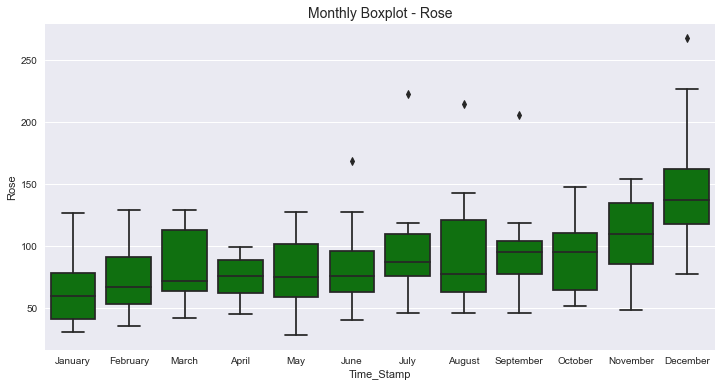

In [173]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'], color='green')
plt.title('Monthly Boxplot - Rose', fontsize=14)

In [174]:
from statsmodels.graphics.tsaplots import month_plot

Text(0.5, 1.0, 'Rose - Monthly plot')

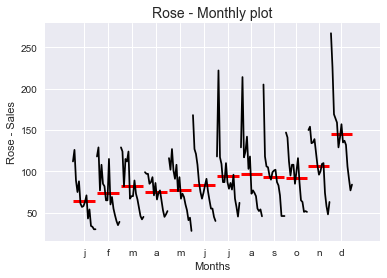

In [175]:
month_plot(df_rose['Rose'],ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

In [176]:
monthly_sales_across_years = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, index = df_rose.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


Text(0.5, 1.0, 'Rose - Monthly sales over years')

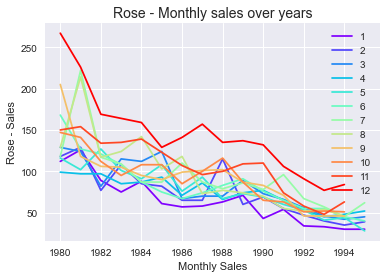

In [177]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

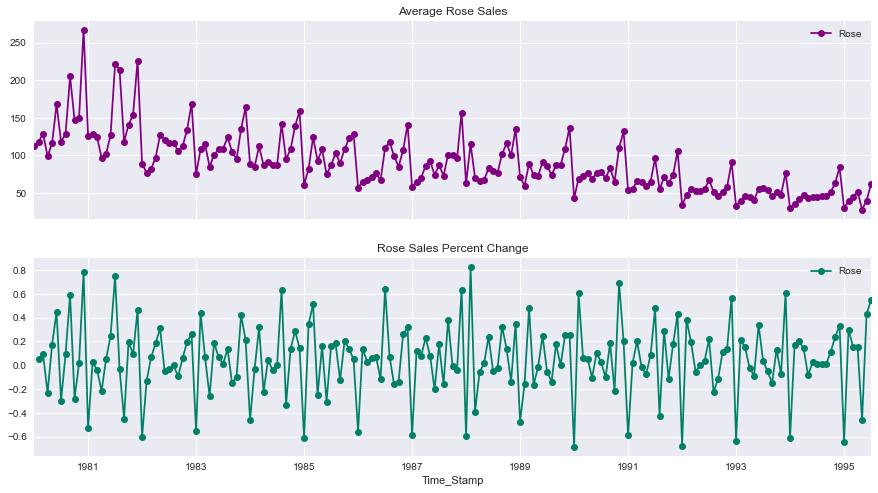

In [178]:
# group by date and get average RetailSales, and precent change
average = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales", color = 'purple')
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change")

Decompose the Time Series and plot the different components.

In [179]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

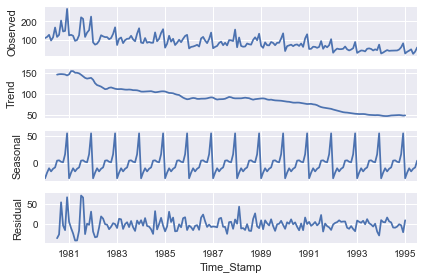

In [180]:
decomposition = seasonal_decompose(df_rose['Rose'],model='additive')
decomposition.plot();

In [181]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Freq: M, Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-1

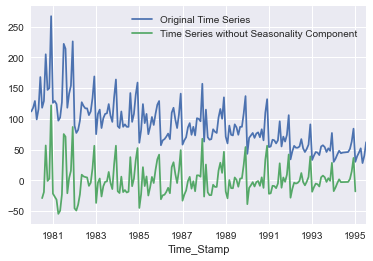

In [182]:
detrend_ts = seasonality + residual
df_rose.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

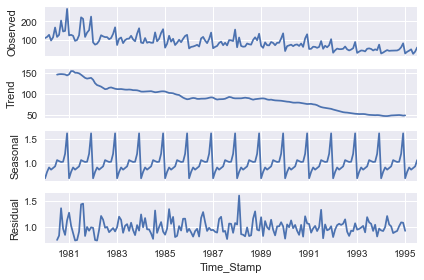

In [183]:
decomposition = seasonal_decompose(df_rose['Rose'],model='multiplicative')
decomposition.plot();

In [184]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Freq: 

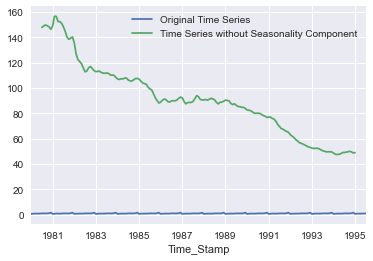

In [185]:
detrend_ts = trend + residual
#df_rose.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

Split the data into training and test. The test data should start in 1991.

In [186]:
train=df_rose[df_rose.index.year < 1991]
test=df_rose[df_rose.index.year >= 1991]

In [187]:
from IPython.display import display

In [188]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [189]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


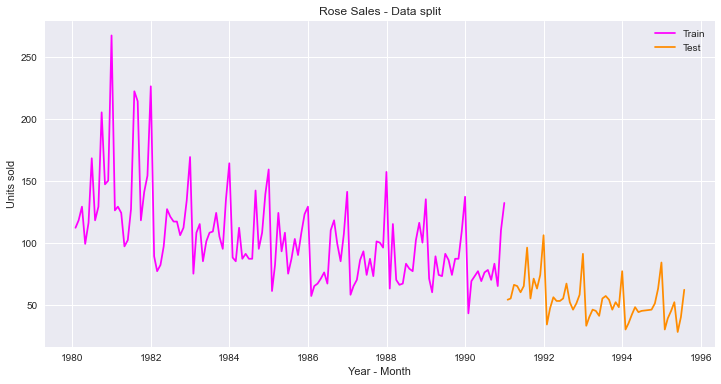

In [190]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='magenta')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

### Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

## Model 1: Linear Regression

In [191]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()


In [192]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [193]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
lr = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [196]:
LinearRegression_train['RegOnTime_rose']        = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr.predict(LinearRegression_test[['time']])

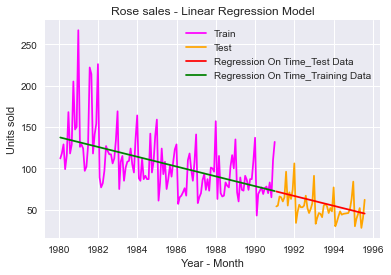

In [197]:
#plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

### Model Evaluation

In [198]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [199]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [200]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [201]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82


### Model 2: Naive forecast

In [202]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [203]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Freq: M, Name: rose_naive, dtype: float64

In [204]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

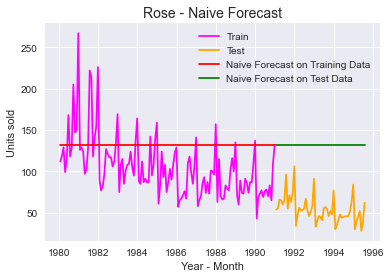

In [205]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

MODEL EVALUATION

In [206]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [207]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [208]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10


Model 3: Simple Average

In [209]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [210]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

Time_Stamp
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Freq: M, Name: rose_mean_forecast, dtype: float64

In [211]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

Time_Stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Freq: M, Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

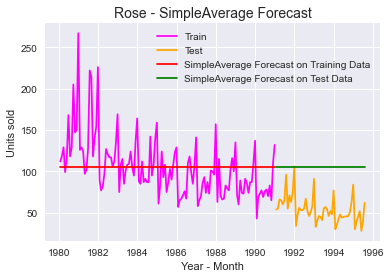

In [212]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

Model Evaluation

In [213]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [214]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.461 and MAPE is 94.93


In [215]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93


Model 4: Moving Average

In [216]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [217]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)


,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


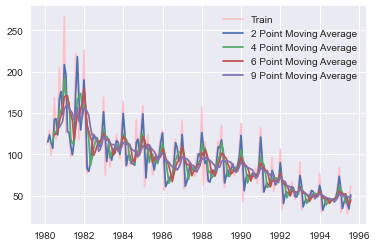

In [218]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [219]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]


Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

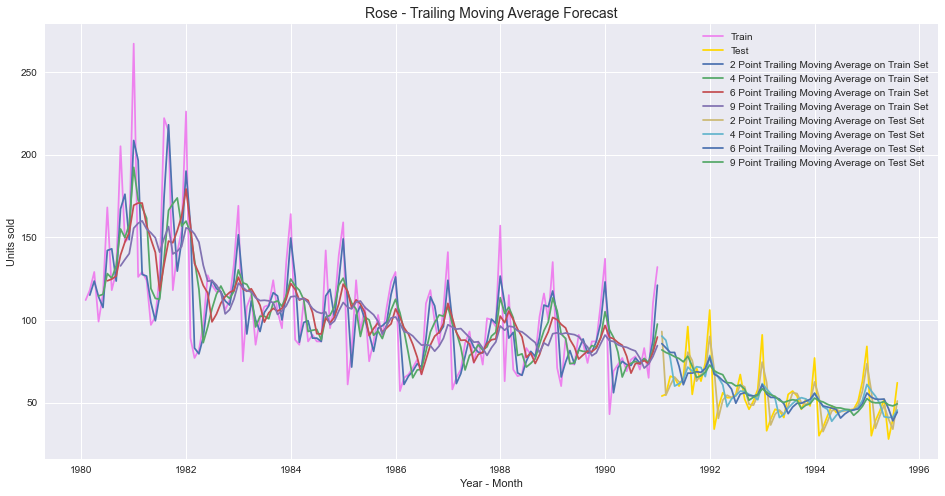

In [220]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

Model Evaluation

In [221]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [222]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01


Model 5: Simple Exponential Smoothing¶

In [223]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [224]:
SES_train = train.copy()
SES_test = test.copy()

In [225]:
SES_train['Rose'].head()

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Freq: M, Name: Rose, dtype: float64

In [226]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])

Test: For alpha = 0.10,  RMSE is 36.8280 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


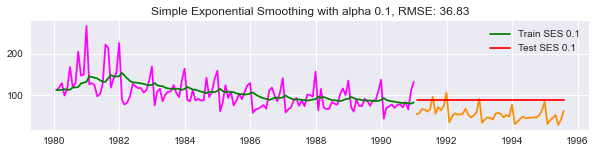

Test: For alpha = 0.20,  RMSE is 41.3619 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


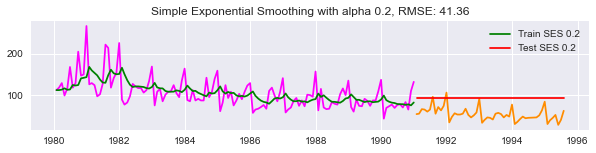

Test: For alpha = 0.30,  RMSE is 47.5048 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


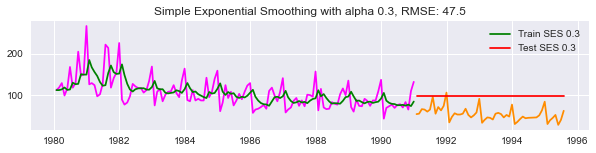

Test: For alpha = 0.50,  RMSE is 59.6418 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


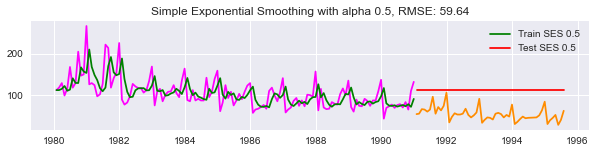

Test: For alpha = 0.99,  RMSE is 79.4987 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


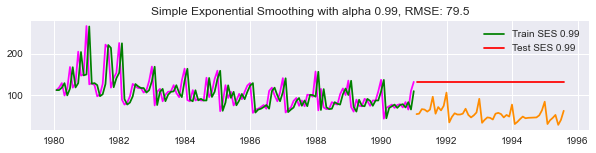

In [227]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [228]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [229]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

,Rose,predict_rose
Time_Stamp,,
1980-01-31,112.0,134.386956
1980-02-29,118.0,132.176246
1980-03-31,129.0,130.776343
1980-04-30,99.0,130.600930
1980-05-31,116.0,127.480341


In [230]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

,Rose,predict_rose
Time_Stamp,,
1991-01-31,54.0,87.104999
1991-02-28,55.0,87.104999
1991-03-31,66.0,87.104999
1991-04-30,65.0,87.104999
1991-05-31,60.0,87.104999


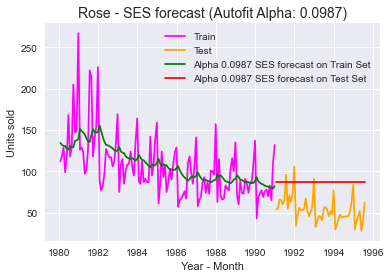

In [231]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

Model Evaluation

In [232]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [233]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [234]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88


Model 6: Double Exponential Smoothing (Holt's Model)

In [235]:
DES_train = train.copy()
DES_test = test.copy()

In [236]:
model_DES_rose = Holt(DES_train['Rose'])

In [237]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [238]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.057142,64.02
1,0.1,0.2,33.450729,24.45,48.688648,83.09
10,0.2,0.1,32.796403,23.06,65.731602,113.20
2,0.1,0.3,33.145789,24.46,78.156641,131.25
20,0.3,0.1,33.528397,23.47,98.653317,170.12


In [239]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.057142,64.02
1,0.1,0.2,33.450729,24.45,48.688648,83.09
10,0.2,0.1,32.796403,23.06,65.731602,113.20
2,0.1,0.3,33.145789,24.46,78.156641,131.25
3,0.1,0.4,33.262191,24.68,99.583473,165.53


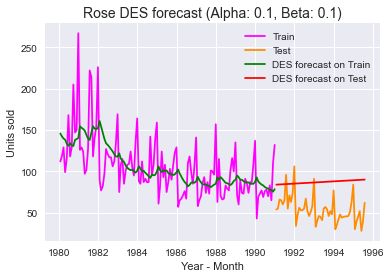

In [240]:
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

Attempting autofit

In [241]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [242]:
model_DES_rose_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_slope']
alpha_6_2 = alpha
beta_6_2 = beta

In [244]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [245]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

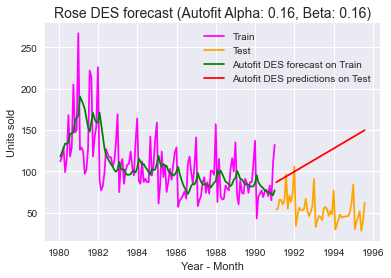

In [246]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [247]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [248]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.100000,0.100000,32.026565,22.78,37.057142,64.02
1,0.100000,0.200000,33.450729,24.45,48.688648,83.09
10,0.200000,0.100000,32.796403,23.06,65.731602,113.20
100,0.157895,0.157895,33.074575,23.99,70.572452,120.25
2,0.100000,0.300000,33.145789,24.46,78.156641,131.25


In [249]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.100000,0.100000,32.026565,22.78,37.057142,64.02
1,0.100000,0.200000,33.450729,24.45,48.688648,83.09
10,0.200000,0.100000,32.796403,23.06,65.731602,113.20
100,0.157895,0.157895,33.074575,23.99,70.572452,120.25
2,0.100000,0.300000,33.145789,24.46,78.156641,131.25


MODEL EVALUATION

In [250]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [251]:
TES_train = train.copy()
TES_test = test.copy()

In [252]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [253]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [254]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [255]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
11,0.1,0.2,0.2,24.365597,15.36,9.640687,13.96
12,0.1,0.2,0.3,23.969166,15.13,9.935740,14.21
10,0.1,0.2,0.1,25.529854,16.06,9.943539,14.39
142,0.2,0.5,0.3,27.631767,17.87,10.026210,14.34
151,0.2,0.6,0.2,28.289836,18.09,10.031639,13.62


In [256]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
151,0.2,0.6,0.2,28.289836,18.09,10.031639,13.62
223,0.3,0.3,0.4,24.209084,16.78,10.169632,13.67
11,0.1,0.2,0.2,24.365597,15.36,9.640687,13.96
214,0.3,0.2,0.5,24.580627,16.87,10.413236,14.00
12,0.1,0.2,0.3,23.969166,15.13,9.935740,14.21


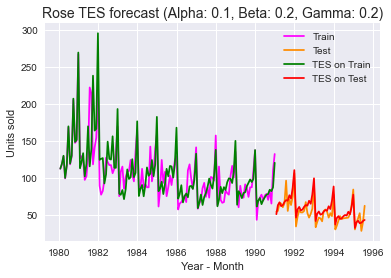

In [257]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [258]:
#aUTOFIT ATTEMPT

model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [259]:
model_TES_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [260]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [261]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

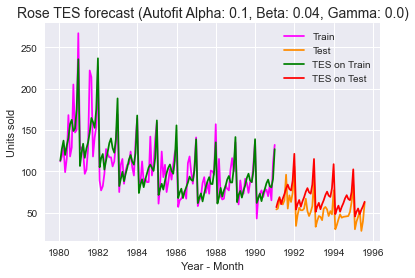

In [262]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [263]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [264]:
resultsDf_7_2.tail()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
996,1.000000,1.000000,0.7,30724.126331,4617.55,23029.955359,11836.06
997,1.000000,1.000000,0.8,1218.755446,493.75,9626.710854,8581.01
998,1.000000,1.000000,0.9,14150.253251,2303.41,9691.905402,7916.19
999,1.000000,1.000000,1.0,1768.254189,614.79,8138.618579,6811.06
1000,0.106096,0.048439,0.0,18.578860,13.21,17.369487,28.88


In [265]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
11,0.1,0.2,0.2,24.365597,15.36,9.640687,13.96
12,0.1,0.2,0.3,23.969166,15.13,9.935740,14.21
10,0.1,0.2,0.1,25.529854,16.06,9.943539,14.39
142,0.2,0.5,0.3,27.631767,17.87,10.026210,14.34
151,0.2,0.6,0.2,28.289836,18.09,10.031639,13.62


In [266]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
151,0.2,0.6,0.2,28.289836,18.09,10.031639,13.62
223,0.3,0.3,0.4,24.209084,16.78,10.169632,13.67
11,0.1,0.2,0.2,24.365597,15.36,9.640687,13.96
214,0.3,0.2,0.5,24.580627,16.87,10.413236,14.00
12,0.1,0.2,0.3,23.969166,15.13,9.935740,14.21


MODEL EVALUATION

In [267]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


In [268]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.1, Beta 0.2, Gamma 0.2",9.640687,13.96
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
RegressionOnTime,15.268955,22.82
"TES Alpha 0.11, Beta 0.05, Gamma 0.00",17.369487,28.88
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.10, Beta 0.10",37.057142,64.02
SimpleAverage,53.460570,94.93


Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

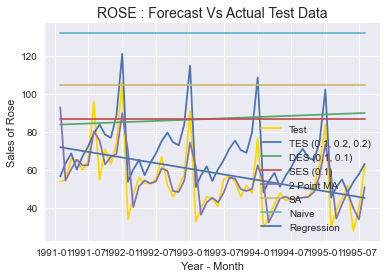

In [269]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')
#TES
#plt.plot(TES_train['predict_rose',alpha_7_2,beta_7_2,gamma_7_2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_rose',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_rose'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['rose_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)

5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Check for stationarity of the whole Time Series data.

In [270]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

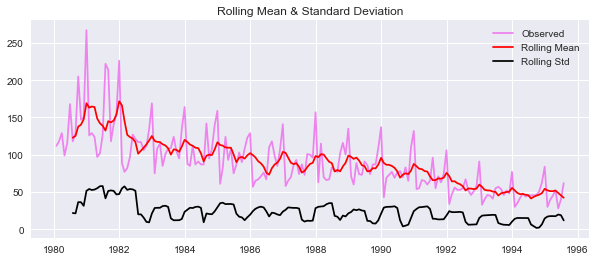

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [271]:
plt.figure(figsize=(10,4))
test_stationarity(df_rose['Rose'], 'violet')

We see that at 5% significant level the Time Series is non-stationary.

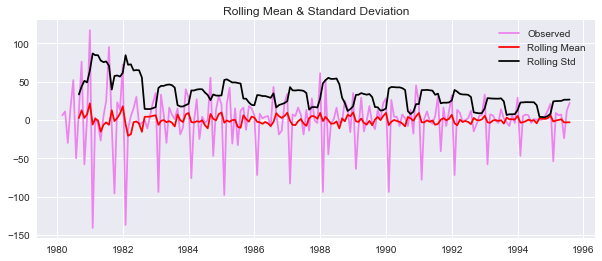

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [272]:
plt.figure(figsize=(10,4))
test_stationarity(df_rose['Rose'].diff().dropna(), 'violet')

Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [273]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF PLOTS

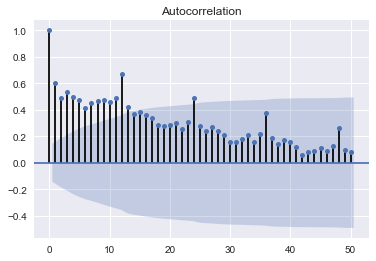

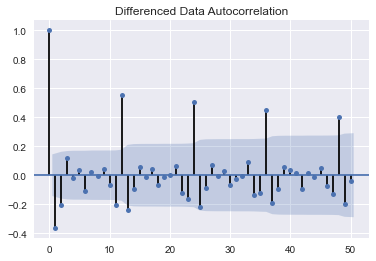

In [275]:
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

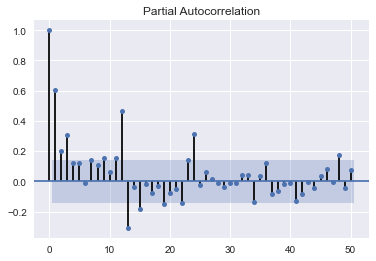

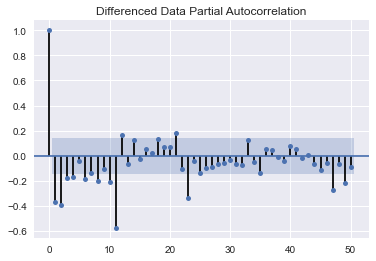

In [276]:
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Model 8 - SARIMA on ROSE
Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).
Original ROSE data

In [277]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [278]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [124]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [125]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301625482
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776281
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3425.3741326551567
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658811
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601629
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654533
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:2726.0410595819467
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374415
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729148085
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244226367
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3517.3073323913945
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.395812273977
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246488163
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713372086
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3181.3271474089215
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133560825
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717934
SARIM

SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3663.665600827837
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934324
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928050684932
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335675151606
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:5671.605538956865
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386751690757
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.996532685078
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.9100103475403
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964820853
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130512948
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409442790962
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:3354.3450336613673
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705695194674
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932510954362
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8290012870173
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3321.2444184249507
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442942111
SARIMA(2, 1, 2)x(2, 1,

In [279]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
221,"(3, 1, 1)","(3, 1, 1, 12)",681.362808
253,"(3, 1, 3)","(3, 1, 1, 12)",681.606495
254,"(3, 1, 3)","(3, 1, 2, 12)",681.973964
222,"(3, 1, 1)","(3, 1, 2, 12)",682.320700
237,"(3, 1, 2)","(3, 1, 1, 12)",683.211699


In [280]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sun, 16 Jan 2022   AIC                            681.363
Time:                                    18:47:55   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0172      0.151      0.114      0.910      -0.279       0.314
ar.L2         -0.0426      0.141   

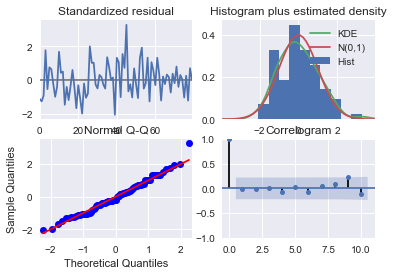

In [281]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [282]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [283]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [284]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.226320,14.458432,16.888313,73.564326
1,63.055447,14.503243,34.629612,91.481282
2,68.117295,14.453294,39.789360,96.445231
3,61.826388,14.449534,33.505822,90.146955
4,68.436666,14.470051,40.075887,96.797445


In [285]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Rose,rose_auto_forecasted
Time_Stamp,,
1991-01-31,54.0,45.226320
1991-02-28,55.0,63.055447
1991-03-31,66.0,68.117295
1991-04-30,65.0,61.826388
1991-05-31,60.0,68.436666


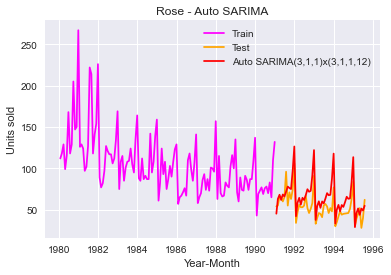

In [286]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [287]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.824 and MAPE is 25.48


In [288]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
2
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [136]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.1, Beta 0.2, Gamma 0.2",9.640687,13.96
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
RegressionOnTime,15.268955,22.82
"Auto SARIMA(3,1,1)x(3,1,1,12)",16.823650,25.48
"TES Alpha 0.11, Beta 0.05, Gamma 0.00",17.369487,28.88
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


In [303]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [304]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [305]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

,param,seasonal,AIC


In [306]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.7976958405473
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794187
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.869058600344
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.3075305492318
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749100533131
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.1702817494221
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-232.9749692999637
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.0018247944942
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380300220522
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.50588487517712
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.4830458114752
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.82264866774517
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.65277118572985
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449430504
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.49925528570668
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199.723

SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-201.09052348870708
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.65161518593564
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.8079064086712
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.73418203777692
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.3304721876333
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.20780918954065
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.7082147495267
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.7897300128968
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73510351625723
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.31561392729247
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.3197986714302
SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.52567294373762
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.6511786732456
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.0808705937922
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.61713823838198
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.1394950107822
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.994942997121
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-148

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.3861138783849
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973856357556
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373596912432
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.2400306680816
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.05002165254365
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194015114115
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25689843639185
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.9697399197302
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91674539400177
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.0552656009751
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221393418645
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212528474742
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.33048451003054
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.1047006421586
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566251524275
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.35961866337266
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757665588353
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC

In [307]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

,param,seasonal,AIC
115,"(1, 0, 0)","(1, 0, 1, 12)",-257.620755
7,"(0, 0, 0)","(1, 0, 1, 12)",-256.170282
133,"(1, 0, 1)","(1, 0, 1, 12)",-255.482061
25,"(0, 0, 1)","(1, 0, 1, 12)",-254.978843
223,"(2, 0, 0)","(1, 0, 1, 12)",-253.620653


In [308]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 12)   Log Likelihood                 132.810
Date:                            Sun, 16 Jan 2022   AIC                           -257.621
Time:                                    19:16:04   BIC                           -246.504
Sample:                                01-31-1980   HQIC                          -253.107
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1688      0.078      2.178      0.029       0.017       0.321
ar.S.L12       0.9872      0.001   

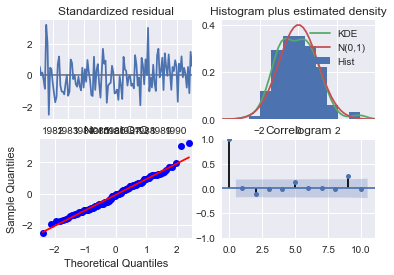

In [309]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [310]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [311]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [312]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1.727927,0.073893,1.583099,1.872756
1991-02-28,1.787618,0.074679,1.641249,1.933986
1991-03-31,1.820459,0.074701,1.674047,1.966871
1991-04-30,1.780392,0.074702,1.633979,1.926806
1991-05-31,1.811725,0.074702,1.665311,1.958138


In [313]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

,Rose,rose_auto_forecasted,rose_manual_forecasted,rose_log_auto_forecasted
Time_Stamp,,,,
1991-01-31,54.0,45.226320,44.733041,53.447467
1991-02-28,55.0,63.055447,64.208694,61.322175
1991-03-31,66.0,68.117295,65.110690,66.139264
1991-04-30,65.0,61.826388,68.453063,60.310408
1991-05-31,60.0,68.436666,61.423433,64.822317


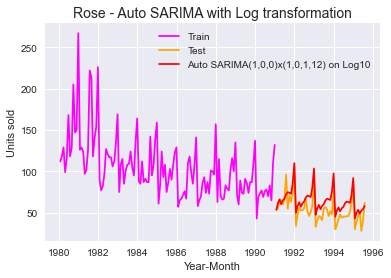

In [314]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [315]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.594 and MAPE is 21.93


In [316]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
MANUAL SARIMA

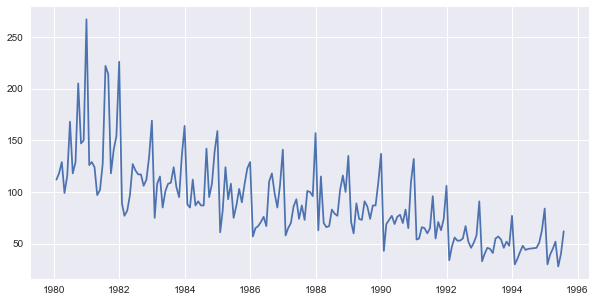

In [289]:
plt.figure(figsize=(10,5))
plt.plot(df_rose['Rose'])

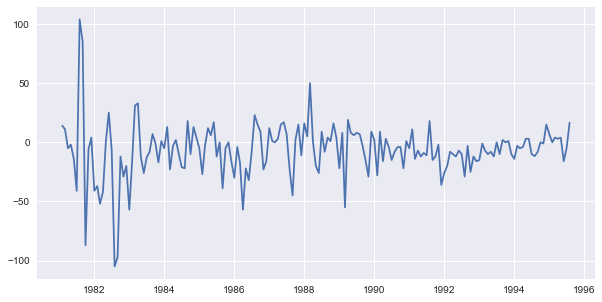

In [290]:
plt.figure(figsize=(10,5))
plt.plot(df_rose['Rose'].diff(12).dropna())

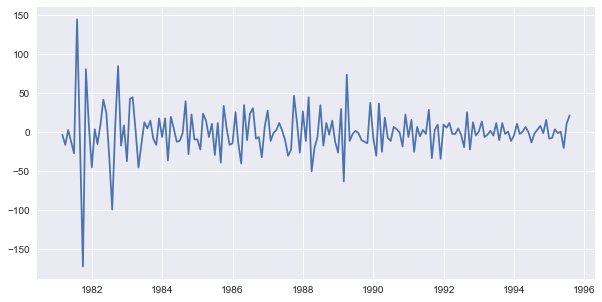

In [291]:
plt.figure(figsize=(10,5))
plt.plot((df_rose['Rose'].diff(12).dropna()).diff().dropna())

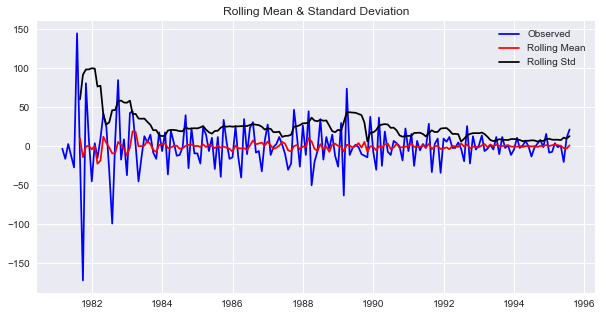

Results of Dickey-Fuller Test:
Test Statistic                  -4.605725
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [292]:
plt.figure(figsize=(10,5))
test_stationarity((df_rose['Rose'].diff(12).dropna()).diff().dropna(),'blue')

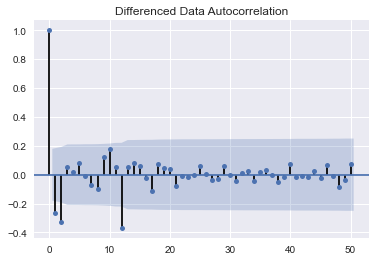

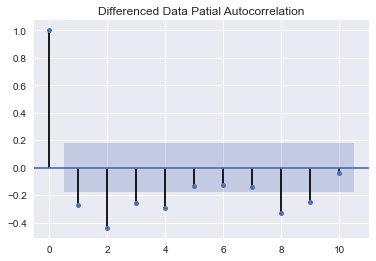

In [293]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [294]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 16 Jan 2022   AIC                            786.737
Time:                                    18:52:28   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

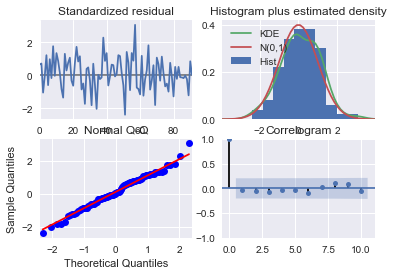

In [295]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [296]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [297]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [298]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.733041,15.552666,14.250375,75.215707
1,64.208694,16.000768,32.847765,95.569622
2,65.110690,16.074606,33.605040,96.616339
3,68.453063,16.150996,36.797692,100.108434
4,61.423433,16.154556,29.761085,93.085782


In [299]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Rose,rose_auto_forecasted,rose_manual_forecasted
Time_Stamp,,,
1991-01-31,54.0,45.226320,44.733041
1991-02-28,55.0,63.055447,64.208694
1991-03-31,66.0,68.117295,65.110690
1991-04-30,65.0,61.826388,68.453063
1991-05-31,60.0,68.436666,61.423433


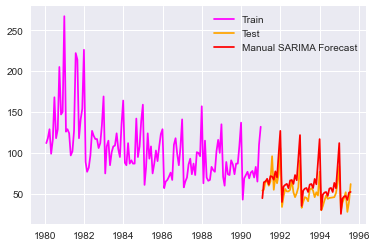

In [300]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [301]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [317]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


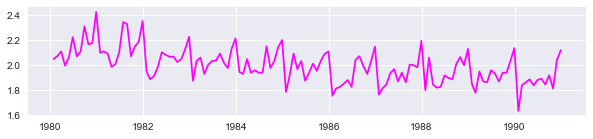

In [318]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

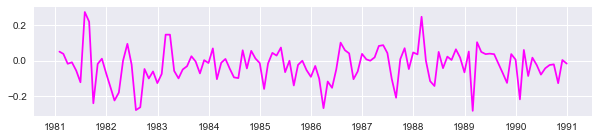

In [319]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna())

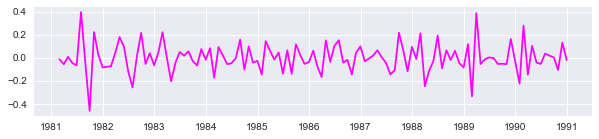

In [320]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna())

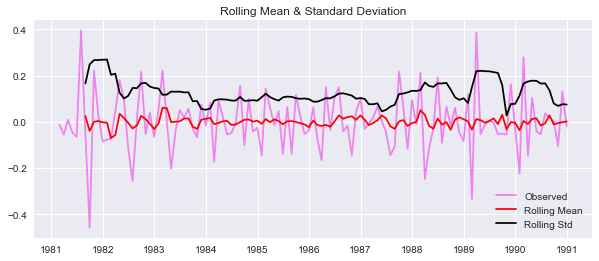

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [321]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

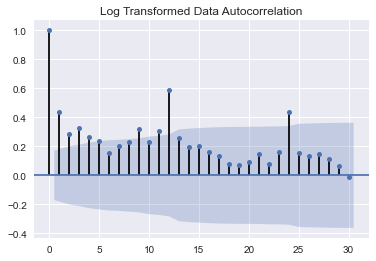

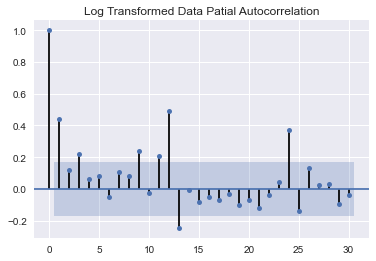

In [322]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

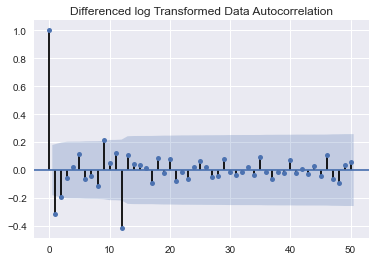

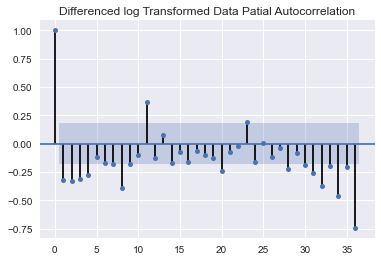

In [323]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [324]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Sun, 16 Jan 2022   AIC                           -243.528
Time:                                    20:01:43   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0018      0.118     -0.015      0.988      -0.233       0.229
ar.L2         -0.1549      0.126   

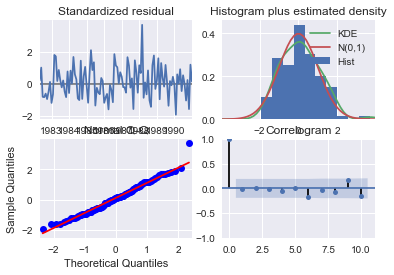

In [325]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [326]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [327]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [328]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1.721102,0.067188,1.589416,1.852789
1991-02-28,1.789068,0.067988,1.655813,1.922322
1991-03-31,1.811255,0.067986,1.678005,1.944505
1991-04-30,1.786864,0.068008,1.653570,1.920157
1991-05-31,1.820838,0.067853,1.687848,1.953828


In [329]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

,Rose,rose_auto_forecasted,rose_manual_forecasted,rose_log_auto_forecasted,rose_log_manual_forecasted
Time_Stamp,,,,,
1991-01-31,54.0,45.226320,44.733041,53.447467,52.614130
1991-02-28,55.0,63.055447,64.208694,61.322175,61.527274
1991-03-31,66.0,68.117295,65.110690,66.139264,64.752285
1991-04-30,65.0,61.826388,68.453063,60.310408,61.215810
1991-05-31,60.0,68.436666,61.423433,64.822317,66.196908


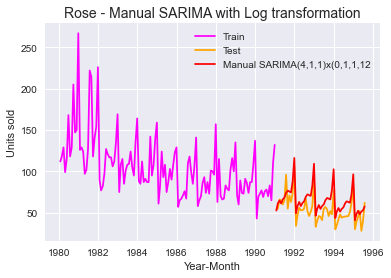

In [330]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [331]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.180 and MAPE is 23.10


In [332]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverage,53.460570,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
SES Alpha 0.01,36.796242,63.88
"DES Alpha 0.16, Beta 0.16",70.572452,120.25
"DES Alpha 0.10, Beta 0.10",37.057142,64.02


In [333]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.1, Beta 0.2, Gamma 0.2",9.640687,13.96
2 point TMA,11.529278,13.54
"Auto SARIMA(1,0,0)x(1,0,1,12)-Log10",13.593960,21.93
"Manual SARIMA(4,1,2)x(0,1,1,12)",13.593960,21.93
"Manual SARIMA(4,1,1)x(0,1,1,12)-Log10",14.179837,23.10
4 point TMA,14.451403,19.49
6 point TMA,14.566327,20.82
9 point TMA,14.727630,21.01
RegressionOnTime,15.268955,22.82
"Manual SARIMA(4,1,2)x(0,1,1,12)",15.377252,22.16


Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

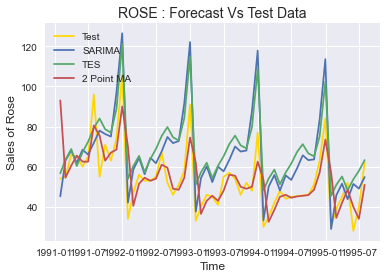

In [137]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)

Build TES Model on Rose full data

In [138]:
model_TES_rose = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [139]:
rmse_rose_tes_full = metrics.mean_squared_error(df_rose['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df_rose['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 20.881 and MAPE is 14.48


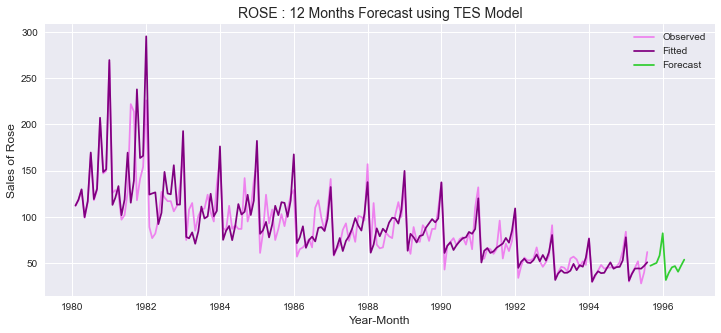

In [140]:
plt.figure(figsize=(12,5))

plt.plot(df_rose['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Sales forecast')

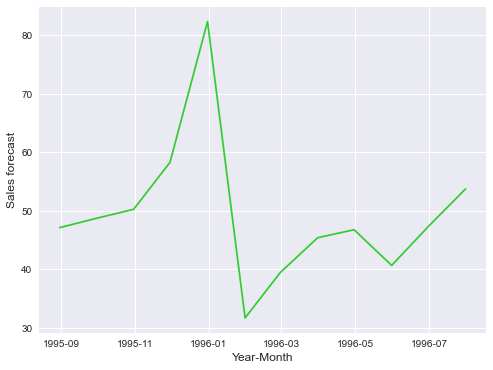

In [141]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)

In [142]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df_rose['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Sun, 16 Jan 2022   AIC                           1342.270
Time:                                    18:32:15   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

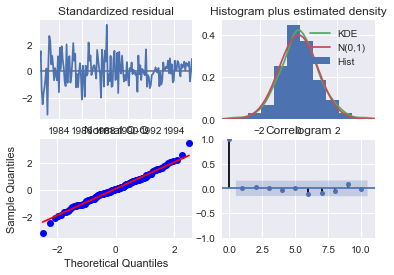

In [143]:
results_full_data_model_rose.plot_diagnostics();

In [173]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.537936,15.245502,16.657302,76.418571
1995-09-30,45.514375,15.769133,14.607442,76.421308
1995-10-31,46.225896,15.827896,15.203789,77.248003
1995-11-30,54.319565,15.831200,23.290983,85.348147
1995-12-31,82.214839,15.835217,51.178384,113.251295


In [174]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(df_rose['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df_rose['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [175]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [176]:
results_full_data_model_rose.fittedvalues.head()

Time_Stamp
1980-01-31      0.000000
1980-02-29    115.410551
1980-03-31    114.398802
1980-04-30    123.947709
1980-05-31     92.219655
Freq: M, dtype: float64

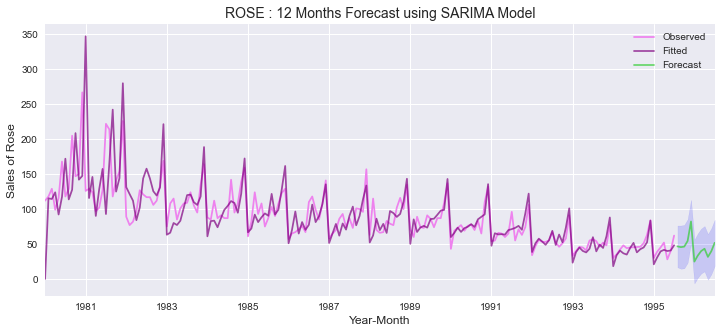

In [178]:
plt.figure(figsize=(12,5))

axis = df_rose['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

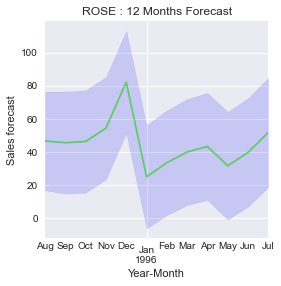

In [179]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)


In [180]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

,ROSE
1995-08-31,46.54
1995-09-30,45.51
1995-10-31,46.23
1995-11-30,54.32
1995-12-31,82.21
1996-01-31,24.81
1996-02-29,33.35
1996-03-31,39.87
1996-04-30,43.23
1996-05-31,31.53


In [181]:
forecast2.describe()

,ROSE
count,12.000000
mean,44.905000
std,14.473222
min,24.810000
25%,38.007500
50%,44.370000
75%,47.830000
max,82.210000


In [182]:
forecast2.sum()

ROSE    538.86
dtype: float64